In [1]:
from sklearn.decomposition import RandomizedPCA
from sklearn.preprocessing import StandardScaler
from patsy import dmatrices
from sklearn.ensemble.forest import RandomForestRegressor
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import cross_val_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from bokeh.plotting import figure, output_file, show

# prepare some data
x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 4, 5]

# output to static HTML file
output_file("lines.html", title="line plot example")

# create a new plot with a title and axis labels
p = figure(title="simple line example", x_axis_label='x', y_axis_label='y')

# add a line renderer with legend and line thickness
p.line(x, y, legend="Temp.", line_width=2)

# show the results
show(p)

In [3]:
#peek at the data before importing
!head -5 Teams.csv
data = pd.read_csv('Teams.csv')

In [4]:
#data is in order by year
data.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,NaN,0.81,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,NaN,0.80,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [5]:
#Difference in the Nan displayed
data.tail(5)

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
2770,2014,NL,SLN,STL,C,1,162,81,90,72,...,145,0.985,St. Louis Cardinals,Busch Stadium III,3540649,101,100,STL,SLN,SLN
2771,2014,AL,TBA,TBD,E,4,162,81,77,85,...,96,0.985,Tampa Bay Rays,Tropicana Field,1446464,97,97,TBR,TBA,TBA
2772,2014,AL,TEX,TEX,W,5,162,81,67,95,...,155,0.982,Texas Rangers,Rangers Ballpark in Arlington,2718733,101,101,TEX,TEX,TEX
2773,2014,AL,TOR,TOR,E,3,162,81,83,79,...,130,0.985,Toronto Blue Jays,Rogers Centre,2375525,102,102,TOR,TOR,TOR
2774,2014,NL,WAS,WSN,E,1,162,81,96,66,...,139,0.984,Washington Nationals,Nationals Park,2579389,104,102,WSN,MON,WAS


In [6]:
#check for nulls
data.isnull().any()

yearID            False
lgID               True
teamID            False
franchID          False
divID              True
Rank              False
G                 False
Ghome              True
W                 False
L                 False
DivWin             True
WCWin              True
LgWin              True
WSWin              True
R                 False
AB                False
H                 False
2B                False
3B                False
HR                False
BB                False
SO                 True
SB                 True
CS                 True
HBP                True
SF                 True
RA                False
ER                False
ERA               False
CG                False
SHO               False
SV                False
IPouts            False
HA                False
HRA               False
BBA               False
SOA               False
E                 False
DP                 True
FP                False
name              False
park            

In [7]:
#data.info()
data.DivWin.unique()

array([nan, 'Y', 'N'], dtype=object)

In [8]:
data.DivWin=data.DivWin.fillna(value='0')
data.CS=data.CS.fillna(value='0')
data.SF=data.SF.fillna(value='0')
data.HBP=data.HBP.fillna(value='0')
data.DivWin=data.DivWin.replace(to_replace='Y',value=1)
data.DivWin=data.DivWin.replace(to_replace='N',value=0)
data['DivWin'] = data['DivWin'].astype(int)

In [9]:
data=data[data.yearID > 1950]

In [10]:
#Feature Creation
data['BattingAverage']=data['H']/data['AB']
data['SluggingPercentage']=((data['H']-data['2B']-data['3B']-
                             data['HR'])+2*data['2B']+3*data['3B']+
                            4*data['HR'])/data['AB']
data['WHIP']=(data['HA']+data['BBA'])/(data['IPouts']/3)


In [11]:
cols = list(data.columns.values)
print cols

['yearID', 'lgID', 'teamID', 'franchID', 'divID', 'Rank', 'G', 'Ghome', 'W', 'L', 'DivWin', 'WCWin', 'LgWin', 'WSWin', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP', 'name', 'park', 'attendance', 'BPF', 'PPF', 'teamIDBR', 'teamIDlahman45', 'teamIDretro', 'BattingAverage', 'SluggingPercentage', 'WHIP']


In [13]:
data=data[['DivWin', 'AB', 'H', 
            'HR', 'BB', 
           'SO', 'SB', 'CS', 'HBP', 
           'SF', 'RA', 'ER', 'ERA', 'CG', 
           'SHO', 'IPouts', 'HA', 'HRA', 
           'BBA', 'SOA', 'E', 'DP', 'FP', 'BPF', 'PPF',
           'BattingAverage', 'SluggingPercentage', 'WHIP']]

In [14]:
data.any().isnull().any()

False

In [15]:
#Data must be scales so all features have 0 mean and variance of 1
scale = StandardScaler()
X = scale.fit(data).transform(data)

In [16]:
#change to 2 components
pca = RandomizedPCA(n_components=2)
pca.fit(X)

RandomizedPCA(copy=True, iterated_power=3, n_components=2, random_state=None,
       whiten=False)

In [17]:
#amount of variance per component
pca.explained_variance_ratio_

array([ 0.30234473,  0.15249409])

In [18]:
# each of the 2 components for each feature in the list
comp = pca.components_
zip(comp[0], comp[1])

[(0.0053223017056577768, -0.19760611086619645),
 (0.19631878176157785, 0.039798633527574193),
 (0.23328918566864992, 0.017857517158189281),
 (0.23437120313819937, -0.11357356865426142),
 (0.11460481043922159, 0.033643282377134265),
 (0.20206617488654216, -0.20500105158946874),
 (0.020307883085512721, -0.052676588619886111),
 (-0.053462516921748776, 0.10684628663379318),
 (0.20495787518326855, -0.27947507169425462),
 (0.20778603595481882, -0.28186737133326534),
 (0.2904578163803318, 0.22407401909963451),
 (0.30571400776691648, 0.17688610639771585),
 (0.25847991531540021, 0.17589220813199372),
 (-0.20216905403173427, 0.19970678823228014),
 (-0.15241727012686707, -0.16280831708086266),
 (0.14314598188674846, 0.024051096346378809),
 (0.26674247338107465, 0.19189399305164592),
 (0.28845906762689377, 0.01394108070112441),
 (0.160904977081858, 0.23739905975173006),
 (0.16962185878191785, -0.2897253106906853),
 (-0.09146621253470176, 0.34104201045421784),
 (0.10447234798437105, 0.1783044154448

In [19]:
trans = pca.fit_transform(X)

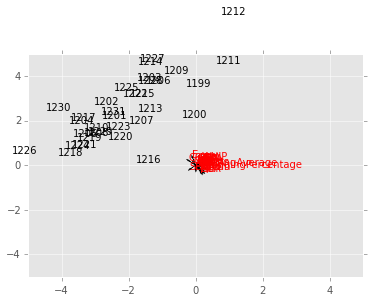

In [27]:
# your original graph

# each componenet
# second component corresponds to urban or city pop
# only plot the first 20 states so the graph isn't crowded
plt.xlim(-5, 5)
plt.ylim(-5, 5)
for index, team in enumerate(data.index):
    if index < 33: 
        plt.text(trans[index][0], trans[index][1], team)
for index, feature in enumerate(data.columns):
    plt.text(comp[0][index], comp[1][index], feature, color='red')
for index, feature in enumerate(data.columns):
    plt.arrow(0, 0, comp[0][index], comp[1][index], feature, color='red',
             fc="k", ec="k",head_width=0.05, head_length=0.1)

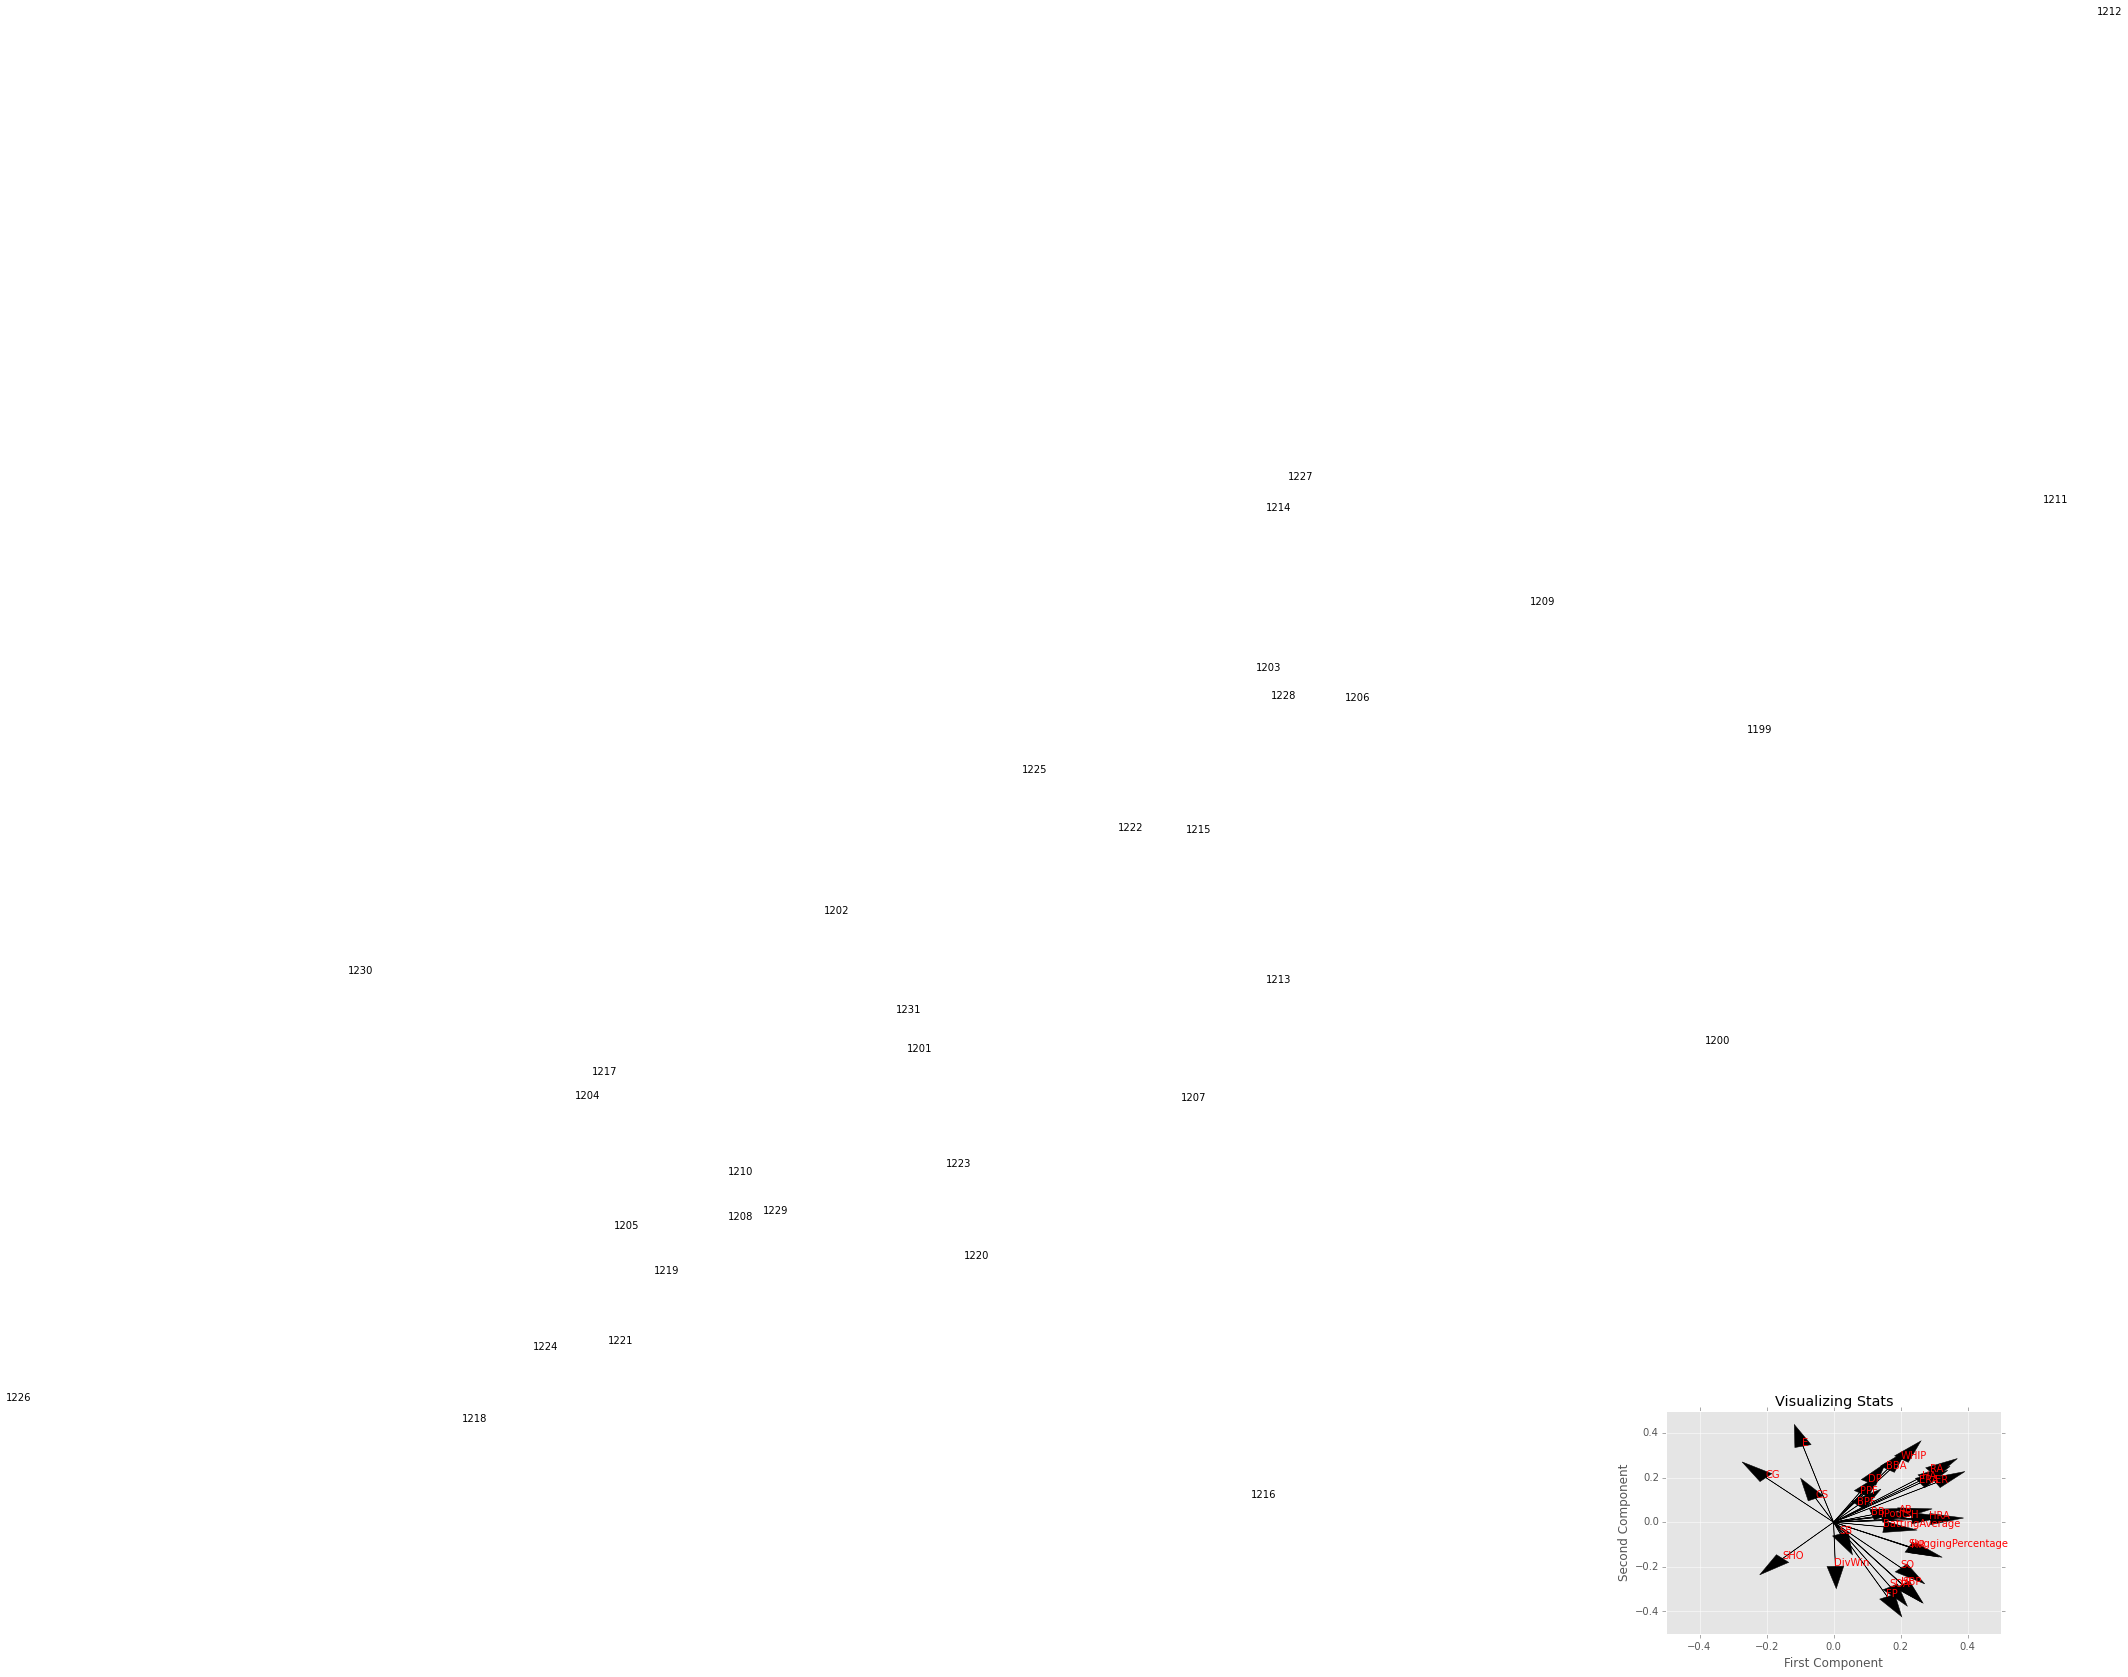

In [24]:
# zoom in while still retaining the scatter plots 
plt.style.use('ggplot')
plt.title('Visualizing Stats')
plt.xlabel('First Component')
plt.ylabel('Second Component')

# reduce the size of the box in the two lines below
plt.xlim(-.5, .5)
plt.ylim(-.5, .5)
for index, team in enumerate(data.index):
    if index < 33:
        plt.text(trans[index][0], trans[index][1], team)
for index, feature in enumerate(data.columns):
    plt.text(comp[0][index], comp[1][index], feature, color='red')
for index, feature in enumerate(data.columns):
    plt.arrow(0, 0, comp[0][index], comp[1][index], feature, color='red',
             fc="k", ec="k",head_width=0.05, head_length=0.1)

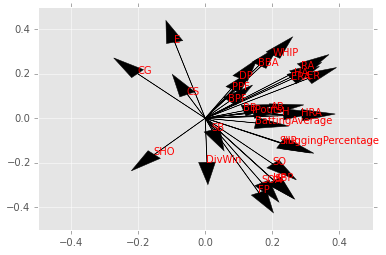

In [25]:
# zoom in without the scatter plots to view the PCA more clearly

plt.xlim(-.5, .5)
plt.ylim(-.5, .5)
for index, team in enumerate(data.index):
    if index < 33: 
        # to zoom in: 
        if trans[index][0] < 1 and trans[index][0] > 1 and trans[index][1] <.5 and trans[index][1] > -.5:
            plt.text(trans[index][0], trans[index][1], team)
            #plt.text(trans[index][0], trans[index][1], team)
for index, feature in enumerate(data.columns):
    plt.text(comp[0][index], comp[1][index], feature, color='red')
for index, feature in enumerate(data.columns):
    plt.arrow(0, 0, comp[0][index], comp[1][index], feature, color='red',
             fc="k", ec="k",head_width=0.05, head_length=0.1)

In [28]:
data.describe()

,DivWin,AB,H,HR,BB,SO,SB,RA,ER,ERA,...,BBA,SOA,E,DP,FP,BPF,PPF,BattingAverage,SluggingPercentage,WHIP
count,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,...,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000,1576.000000
mean,0.142132,5420.325508,1403.919416,142.058376,523.487944,931.015228,95.336294,699.745558,630.041878,3.990425,...,523.486675,931.012690,122.746193,149.307741,0.976545,100.200508,100.201142,0.258908,0.396043,1.355938
std,0.349296,338.974369,119.540259,39.651567,76.258140,180.053022,42.448668,100.449792,96.358943,0.584560,...,74.537702,181.523017,25.101628,20.144049,0.006110,4.692489,4.794788,0.012838,0.032617,0.095102
min,0.000000,3493.000000,797.000000,32.000000,275.000000,379.000000,13.000000,331.000000,293.000000,2.450000,...,268.000000,388.000000,54.000000,74.000000,0.960000,88.000000,88.000000,0.214124,0.290316,1.102115
25%,0.000000,5410.000000,1349.750000,113.000000,474.000000,816.000000,65.000000,635.750000,567.000000,3.577500,...,476.000000,805.000000,105.000000,136.000000,0.970000,97.000000,97.000000,0.250326,0.374681,1.290680
50%,0.000000,5498.000000,1411.000000,140.000000,521.000000,925.000000,91.000000,697.000000,625.500000,3.945000,...,523.000000,929.000000,123.000000,149.500000,0.980000,100.000000,100.000000,0.259417,0.395127,1.352514
75%,0.000000,5566.000000,1476.000000,167.000000,572.000000,1054.000000,122.000000,763.250000,691.000000,4.360000,...,572.000000,1055.250000,140.000000,162.250000,0.980000,103.000000,103.000000,0.267343,0.418542,1.418351
max,1.000000,5781.000000,1684.000000,264.000000,775.000000,1535.000000,341.000000,1103.000000,1015.000000,6.380000,...,801.000000,1450.000000,210.000000,215.000000,0.991000,129.000000,129.000000,0.293993,0.490900,1.733939


In [29]:
#used for importance

y, X_new = dmatrices('DivWin ~ 0 + AB + H  + HR + BB + SO + SB + CS + HBP + SF + RA + ER + ERA + CG + SHO + IPouts + HA + HRA + BBA + SOA + E + DP + FP + BPF + PPF + BattingAverage + SluggingPercentage + WHIP', data, 
                     return_type = 'dataframe')
y = np.ravel(y)

In [30]:
rf2 = RandomForestRegressor(n_estimators = 100, max_features='sqrt')
rf2.fit(X_new, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [31]:
# feature importances
# the higher, the more important the feature
d = {'importance': rf2.feature_importances_}
pd.DataFrame(d, index=X_new.columns).sort('importance', ascending=[0])

,importance
SluggingPercentage,6.395784e-02
BattingAverage,5.124223e-02
WHIP,5.111606e-02
H,4.725813e-02
RA,4.670026e-02
ERA,4.481455e-02
HR,4.347725e-02
BB,4.223585e-02
SB,3.977137e-02
ER,3.659997e-02


In [32]:
# random forests don't use distance so they don't need to be scaled
# 0 to force no intercept
y, X = dmatrices('DivWin ~ 0 + SluggingPercentage + WHIP + H + ERA + SB + BattingAverage',
                data, return_type = 'dataframe')
y = np.ravel(y)

In [33]:
rf = RandomForestRegressor(n_estimators = 100, max_features='sqrt')
rf.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [34]:
rf = RandomForestRegressor(n_estimators = 100, max_features='sqrt')
rf.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [35]:
rf = RandomForestClassifier(n_estimators = 100, max_features='sqrt')
rf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [36]:
# not such a great result with our naive random forest...
# we take np.abs because scikit learn returns a negative number for mean_absolute_error by default
np.abs(cross_val_score(rf, X, y, scoring='mean_absolute_error', cv=10, n_jobs=-1).mean())

0.15047766897540005

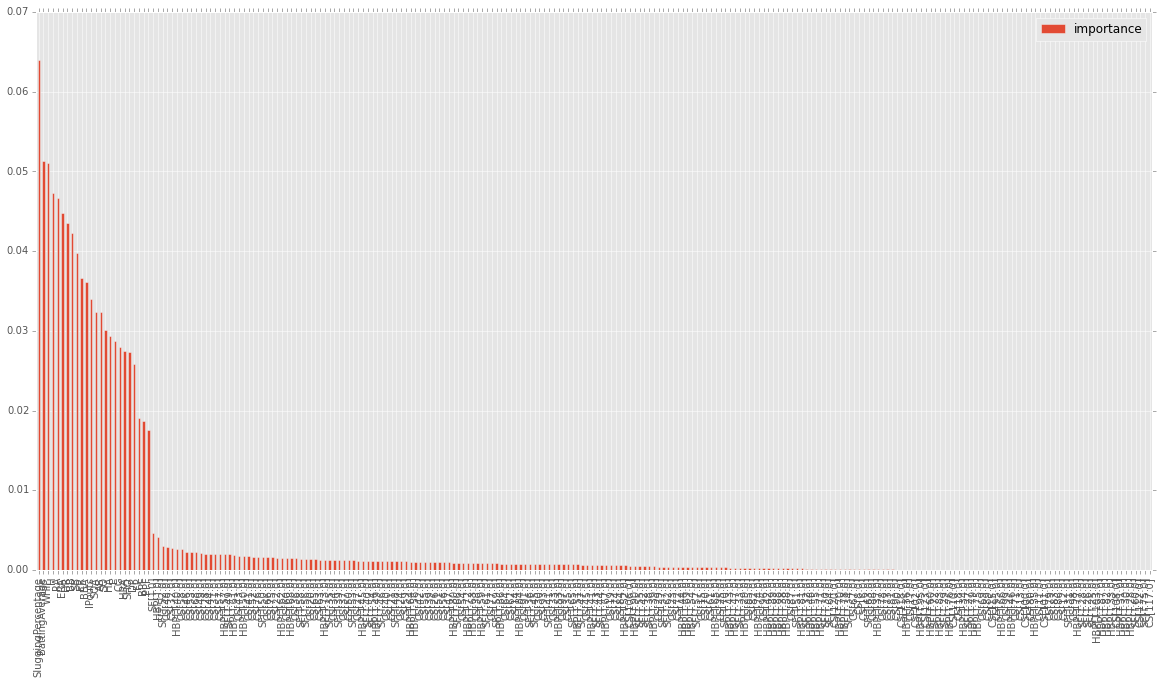

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

d = {'importance': rf2.feature_importances_}
pd.DataFrame(d, index=X_new.columns).sort('importance', ascending=[0]).plot(kind='bar', figsize=(20,10))

In [38]:
data.head()

,DivWin,AB,H,HR,BB,SO,SB,CS,HBP,SF,...,BBA,SOA,E,DP,FP,BPF,PPF,BattingAverage,SluggingPercentage,WHIP
1199,0,5378,1428,127,756,594,20,21,0,0,...,599,658,138,184,0.97,110,109,0.265526,0.391595,1.438170
1200,0,5492,1511,184,603,649,89,70,0,0,...,549,693,128,192,0.97,102,99,0.275127,0.434450,1.341532
1201,0,5293,1385,130,565,617,80,34,0,0,...,595,604,145,157,0.97,93,93,0.261666,0.393539,1.420446
1202,0,5378,1453,86,596,524,99,70,0,0,...,549,572,151,176,0.97,98,98,0.270175,0.384530,1.341326
1203,0,5307,1327,103,477,647,63,30,0,0,...,572,544,181,161,0.97,102,104,0.250047,0.363671,1.435379


In [39]:
win=data[data.DivWin == 1]

In [40]:
win.head()

,DivWin,AB,H,HR,BB,SO,SB,CS,HBP,SF,...,BBA,SOA,E,DP,FP,BPF,PPF,BattingAverage,SluggingPercentage,WHIP
1517,1,5460,1411,141,485,665,59,48,0,0,...,438,893,115,114,0.98,101,101,0.258425,0.379670,1.226298
1518,1,5518,1465,175,634,806,82,45,0,0,...,498,897,101,145,0.98,101,99,0.265495,0.413556,1.148676
1529,1,5677,1520,163,599,906,115,70,0,0,...,524,906,150,177,0.97,104,102,0.267747,0.408490,1.277221
1532,1,5427,1311,109,527,1089,66,43,0,0,...,517,1012,122,146,0.98,102,101,0.241570,0.350838,1.181199
1542,1,5545,1424,179,717,952,84,39,0,0,...,469,941,117,148,0.98,101,98,0.256808,0.401082,1.208390


In [41]:
win.describe()

,DivWin,AB,H,HR,BB,SO,SB,RA,ER,ERA,...,BBA,SOA,E,DP,FP,BPF,PPF,BattingAverage,SluggingPercentage,WHIP
count,224,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,...,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000
mean,1,5455.723214,1454.687500,161.558036,555.982143,956.843750,111.754464,649.022321,588.745536,3.697946,...,486.562500,1003.303571,109.933036,145.017857,0.979795,100.267857,99.348214,0.266417,0.416299,1.297015
std,0,372.086776,128.342698,40.119622,80.212831,173.203495,42.548600,89.187435,86.825233,0.484866,...,64.437376,191.549492,21.175542,20.059545,0.005276,3.985359,4.032847,0.011134,0.028582,0.075582
min,1,3529.000000,883.000000,45.000000,300.000000,419.000000,17.000000,331.000000,293.000000,2.580000,...,268.000000,404.000000,72.000000,74.000000,0.970000,88.000000,88.000000,0.236517,0.338281,1.120677
25%,1,5477.000000,1411.750000,136.750000,507.750000,855.000000,82.750000,596.750000,535.500000,3.337500,...,452.750000,870.250000,93.750000,134.000000,0.980000,98.000000,97.000000,0.259220,0.396726,1.240865
50%,1,5530.500000,1467.500000,162.000000,555.000000,953.500000,108.000000,649.500000,591.500000,3.680000,...,484.000000,1025.500000,108.000000,145.000000,0.980000,100.000000,99.000000,0.266073,0.415355,1.291528
75%,1,5594.250000,1523.750000,187.250000,609.000000,1071.000000,140.250000,697.000000,639.750000,3.982500,...,524.000000,1139.000000,125.000000,158.000000,0.983000,103.000000,102.000000,0.273542,0.435739,1.344172
max,1,5735.000000,1665.000000,264.000000,750.000000,1387.000000,314.000000,871.000000,809.000000,5.070000,...,634.000000,1428.000000,177.000000,196.000000,0.988000,117.000000,115.000000,0.293082,0.484503,1.500000
